# Compare Temperature Across Locations

Minimum and Maximum Temperature Comparison
* TMAX: The maximum temperature on a day between two locations
* TMIN: The minimum temperature on a day between two locations
* Boxenplot of daily TMAX or TMIN by month for one location

Mininum Temperature for Gardeners
* USDA Plant Hardiness Zones

The Ideal Temperature (Location)
* Based on TMAX

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import functions

## Minimum and Maximum Temperature Comparison

In [2]:
# Station 1 - Clatskanie
df = pd.read_csv('../data/temperature/temperature_97016.csv')
df = df[df['STATION']=='USC00351643']
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['year']<2025]

# Verify station 
# functions.view_station_date_ranges(df)
# geo_data = pd.read_csv('../data/geo_data.csv')
# functions.map_stations(geo_data)

# station 2
df = pd.read_csv('../data/temperature_coos_bay.csv')
df = df[df['STATION']=='USC00351836']
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df2 = df[df['year']<2025]


assert len(df1['STATION'].unique()) == 1
assert len(df2['STATION'].unique()) == 1

In [3]:
# # Station 1 - Chicago
# df = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df1 = df[df['year']<2025]
# assert len(df['STATION'].unique()) == 1

In [4]:
# # Station 2 - Tampa
# df = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df = df[df['year']<2025]
# assert len(df['STATION'].unique()) == 1

# df2 = df.copy()

In [5]:
# # Station 2 - Portland
# df = pd.read_csv('../data/temperature_97218.csv')
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df = df[df['year']<2025]
# assert len(df['STATION'].unique()) == 1

# df2 = df.copy()

In [6]:
# Merge the stations into one df
df1_suffix = '_CLATSKANIE'
# df1_suffix = '_ORD'
# df2_suffix = '_PDX'
# df2_suffix = '_TPA'
df2_suffix = '_COOS_BAY'
df = df1.merge(df2,
                on=['DATE', 'year'],
                how='inner',
                suffixes=(df1_suffix, df2_suffix)
)

In [7]:
df2[df2['year'] == 2021]

,STATION,NAME,DATE,TMAX,TMIN,year,month
11315,USC00351836,"COQUILLE CITY, OR US",2021-01-01,54.0,46.0,2021,1
11316,USC00351836,"COQUILLE CITY, OR US",2021-01-02,56.0,43.0,2021,1
11317,USC00351836,"COQUILLE CITY, OR US",2021-01-03,57.0,44.0,2021,1
11318,USC00351836,"COQUILLE CITY, OR US",2021-01-04,61.0,43.0,2021,1
11319,USC00351836,"COQUILLE CITY, OR US",2021-01-05,56.0,37.0,2021,1
...,...,...,...,...,...,...,...
11675,USC00351836,"COQUILLE CITY, OR US",2021-12-27,39.0,31.0,2021,12
11676,USC00351836,"COQUILLE CITY, OR US",2021-12-28,37.0,29.0,2021,12
11677,USC00351836,"COQUILLE CITY, OR US",2021-12-29,44.0,33.0,2021,12
11678,USC00351836,"COQUILLE CITY, OR US",2021-12-30,44.0,31.0,2021,12


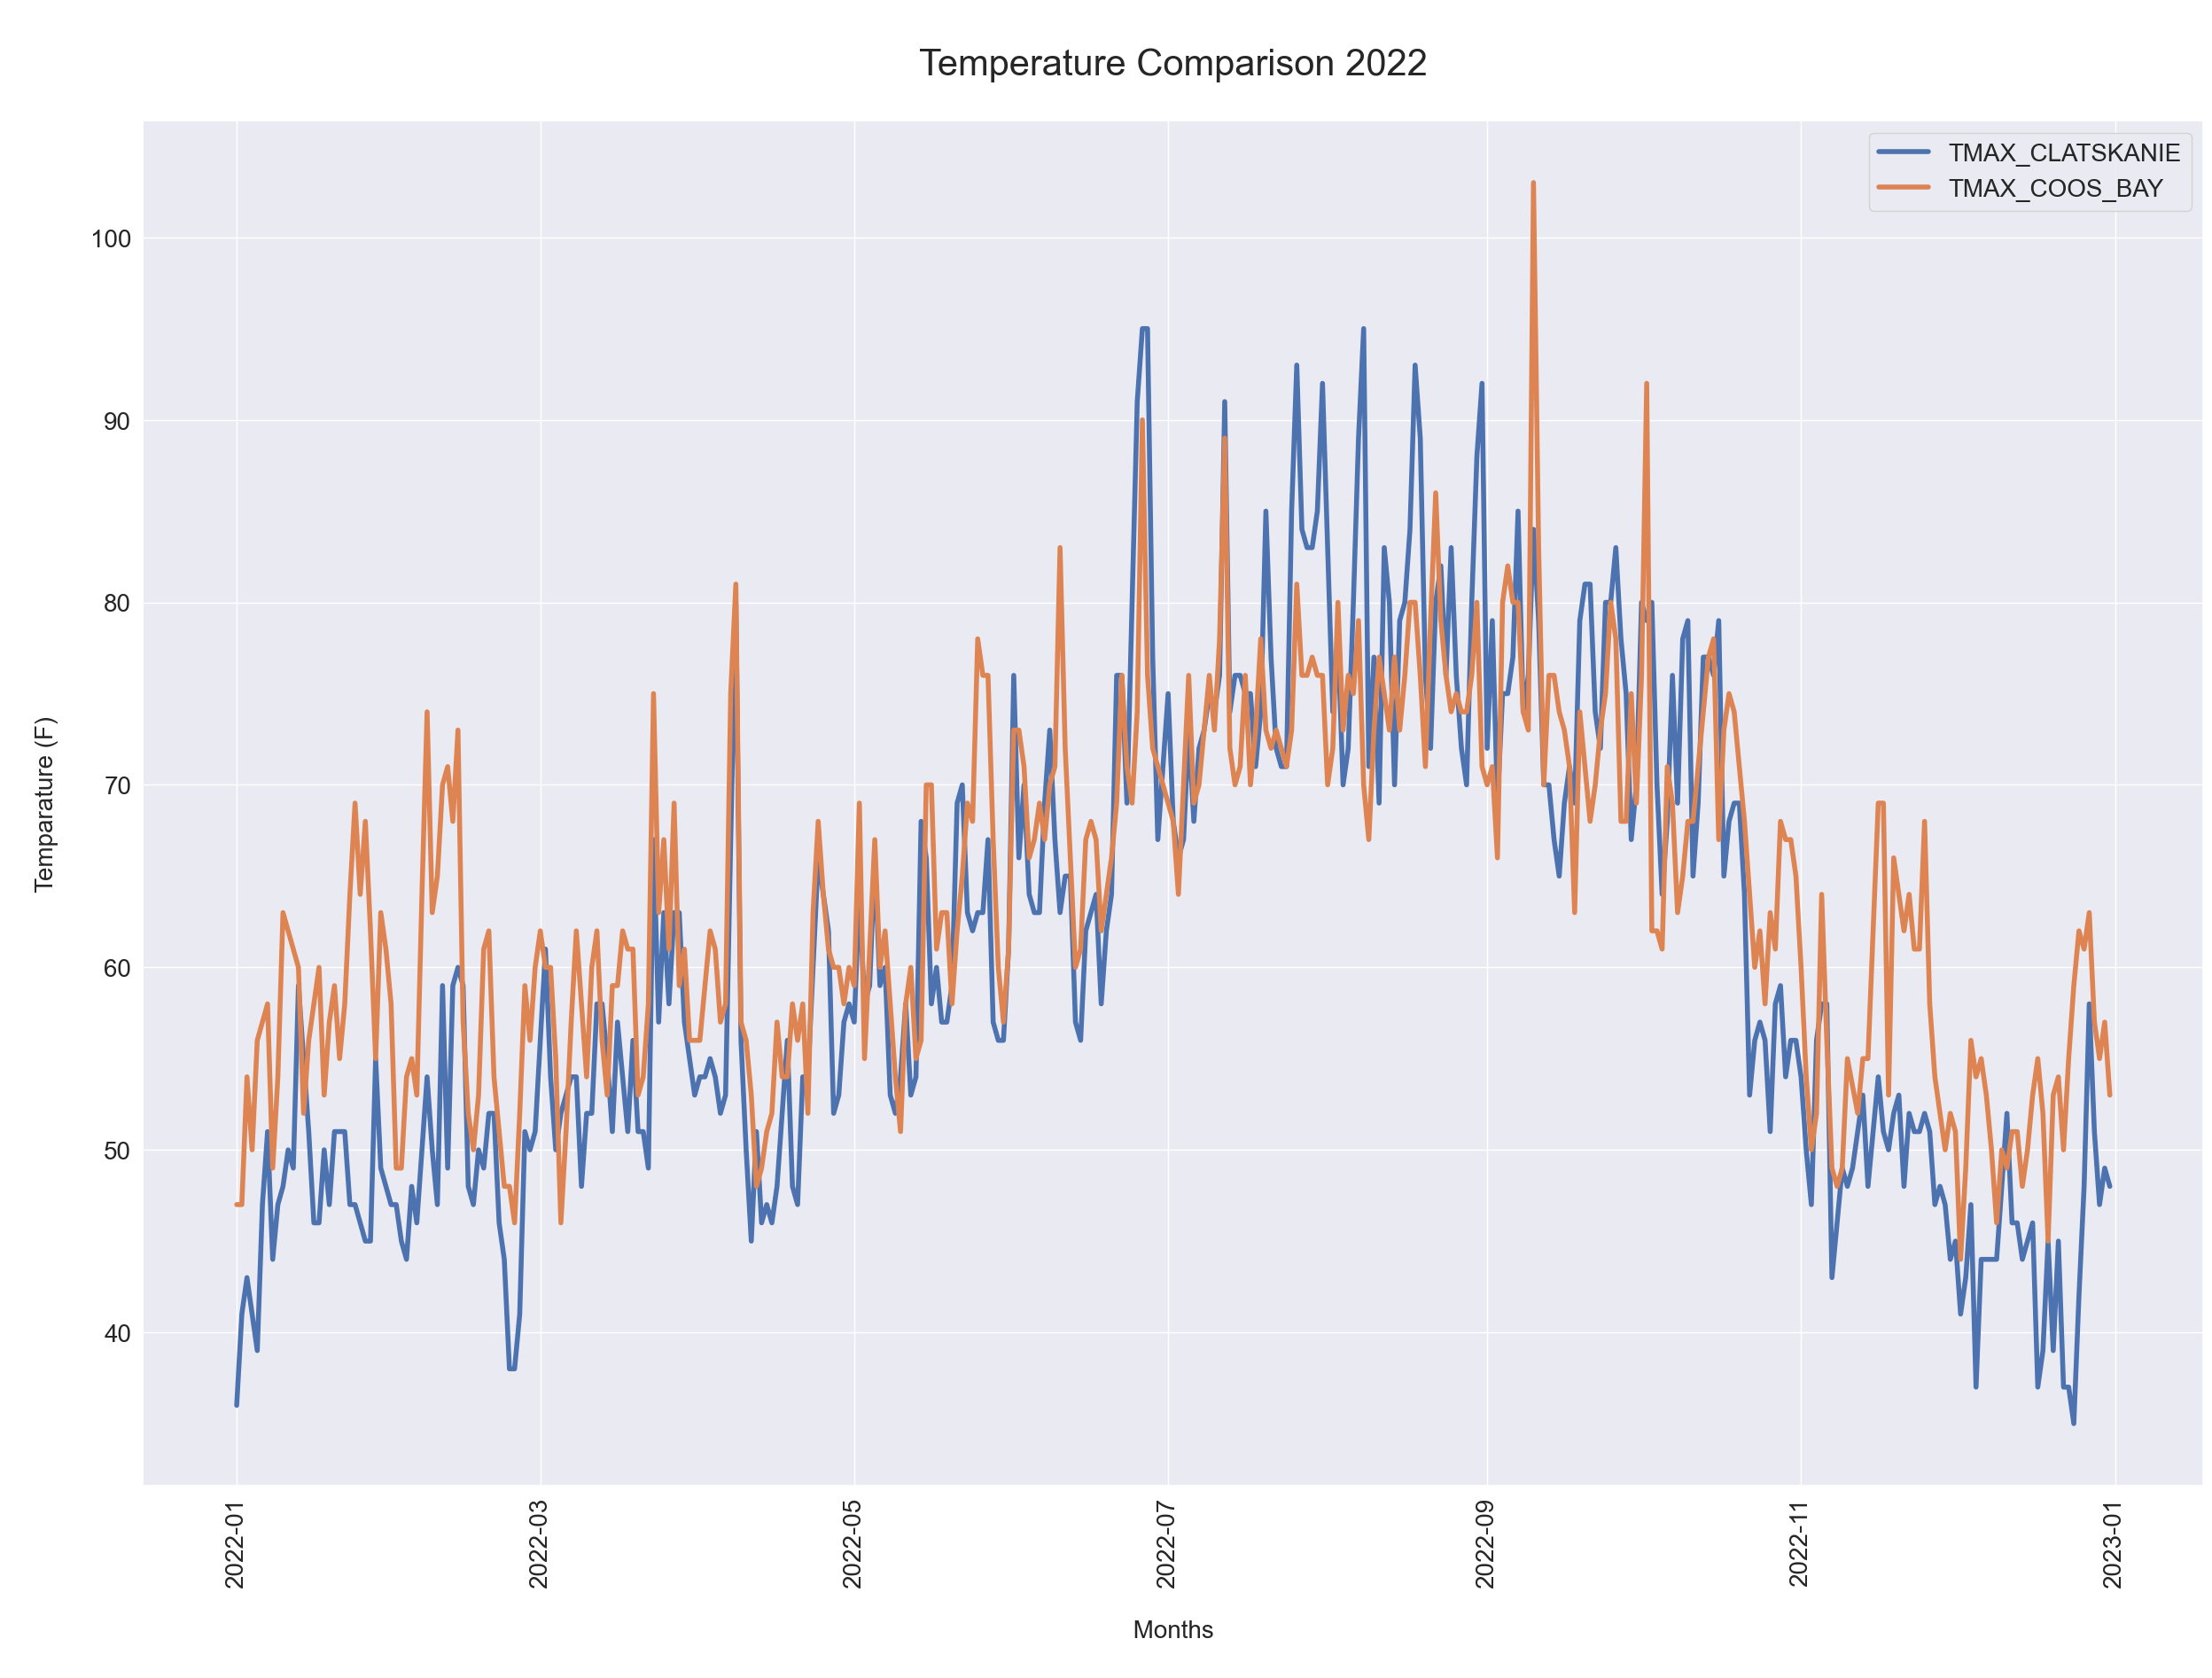

In [8]:
# Plot maximum temperature
pmax = functions.plot_temp_compare(df, 'TMAX', 2022)
# pmax.savefig('tmax_compare.jpg') 

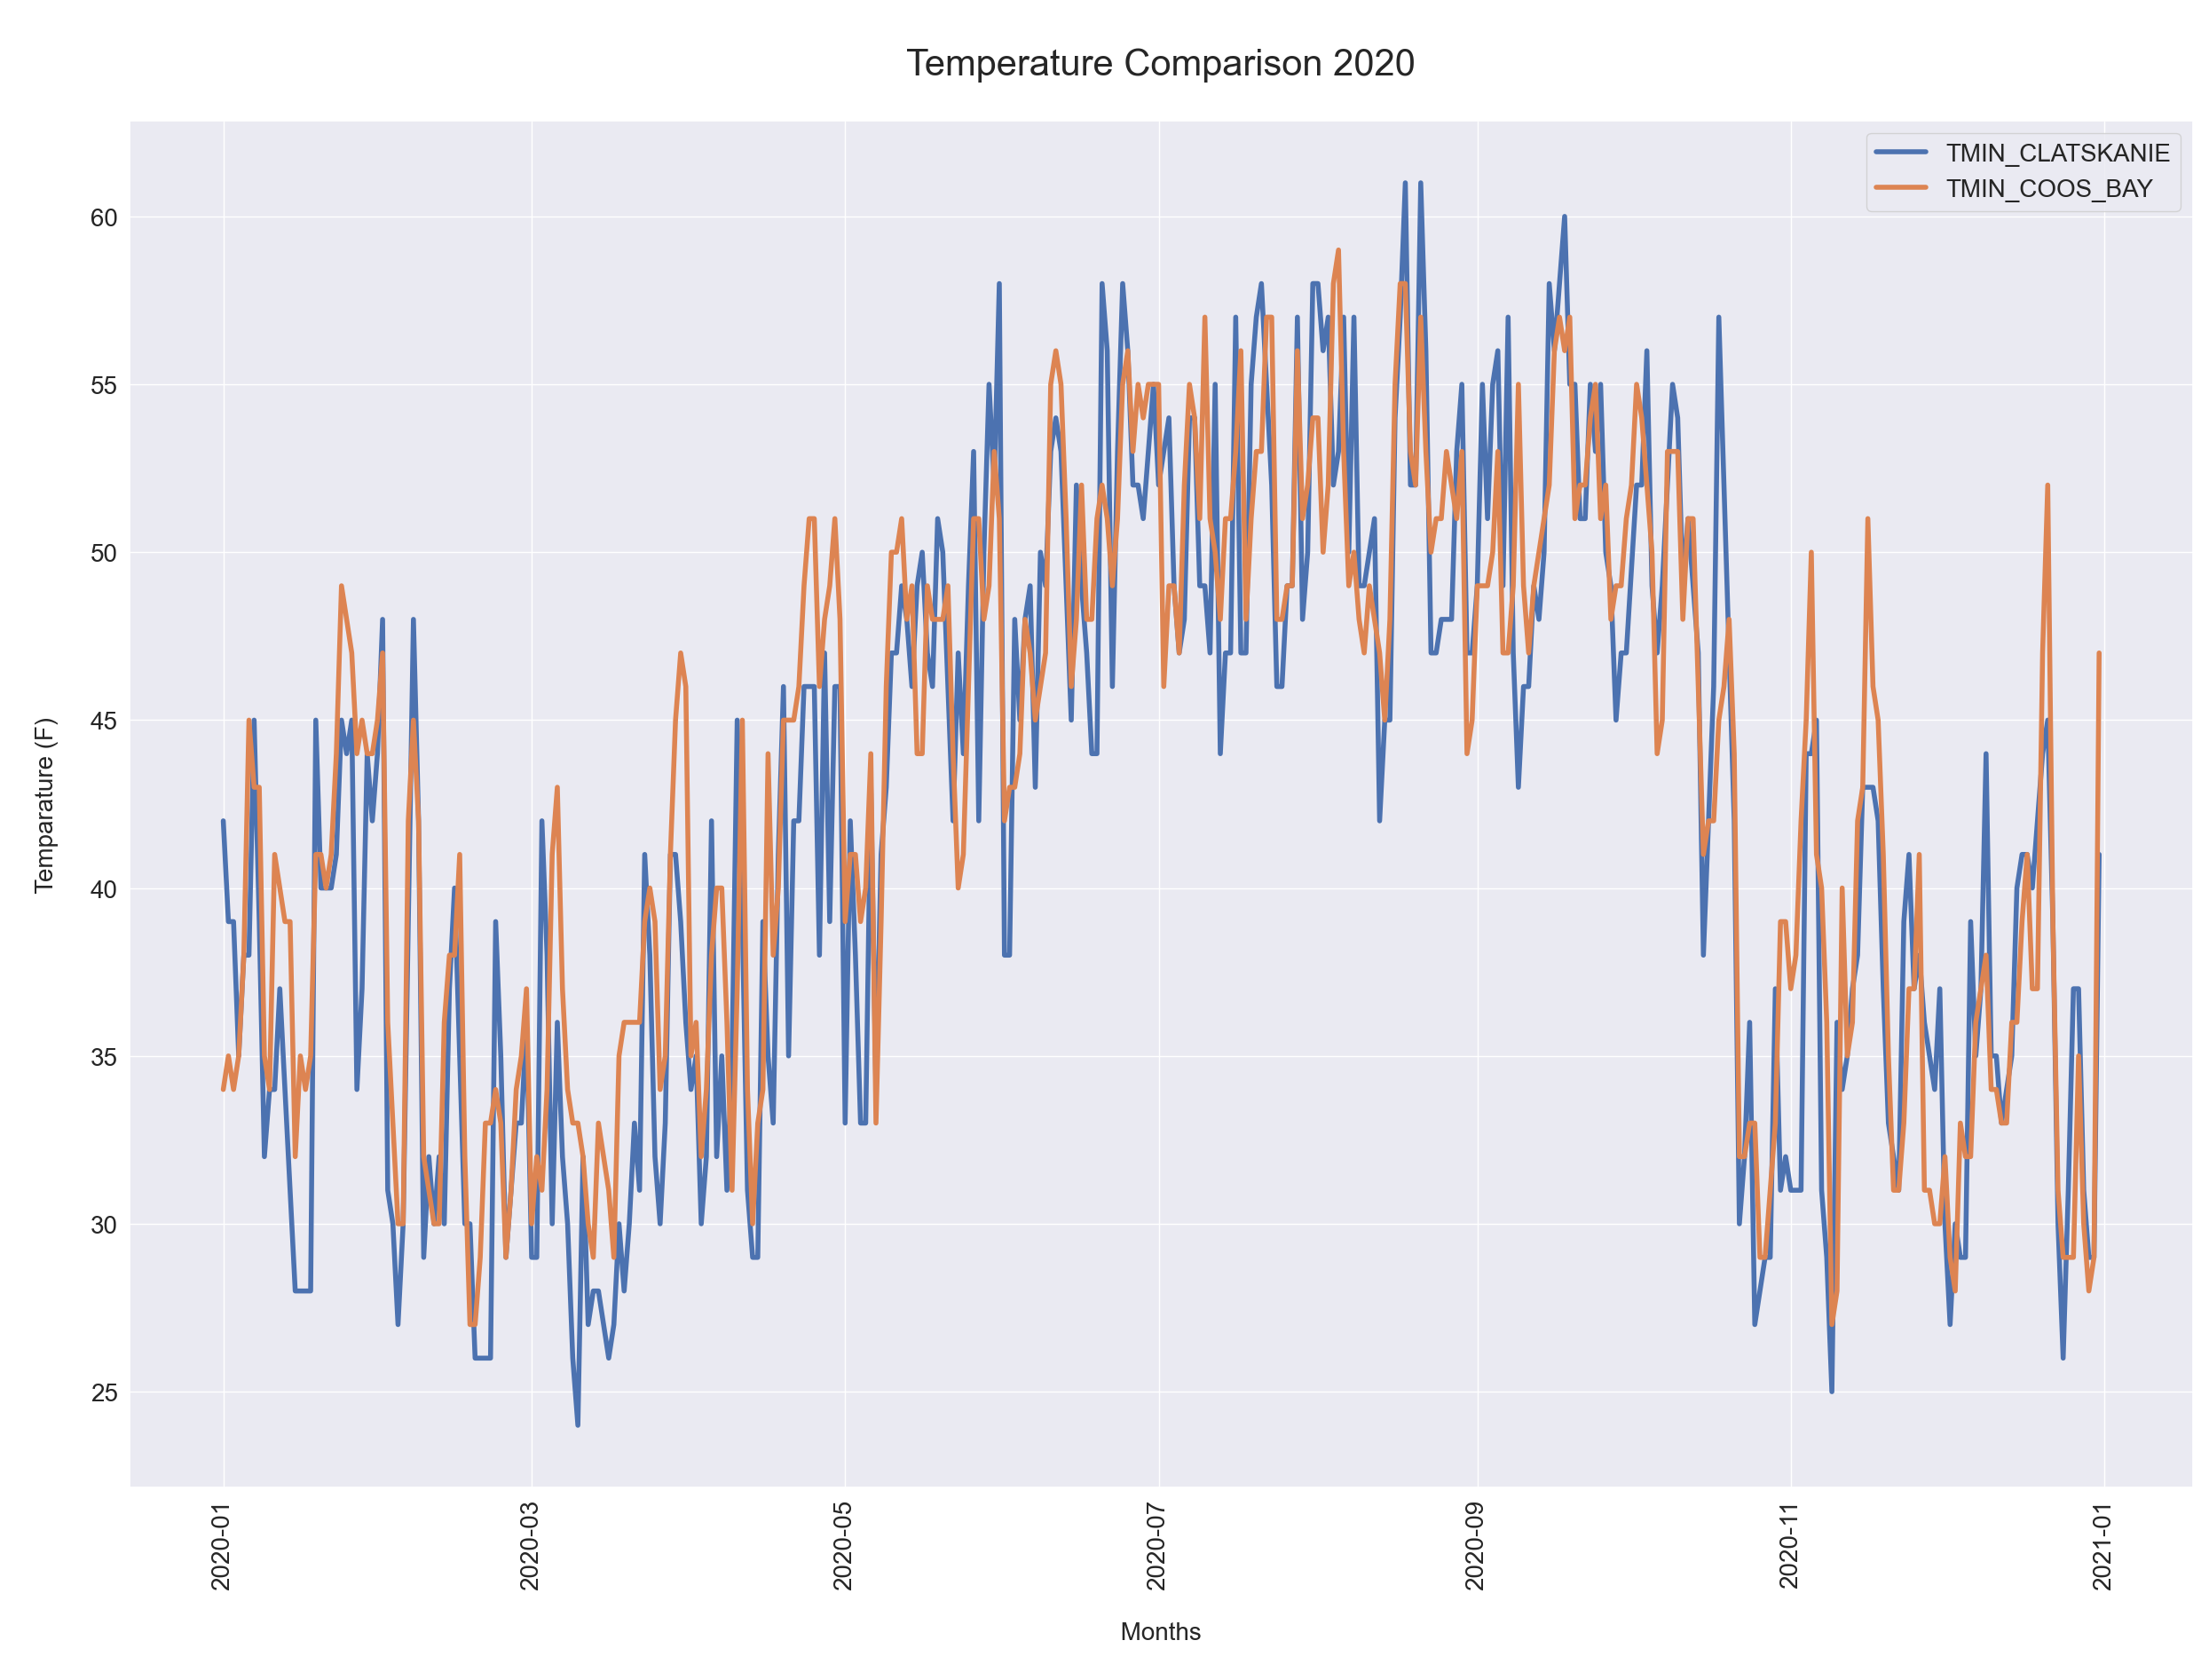

In [9]:
# Plot minimum temperature
pmin = functions.plot_temp_compare(df, 'TMIN', 2020)
# pmin.savefig('tmin_compare.jpg') 

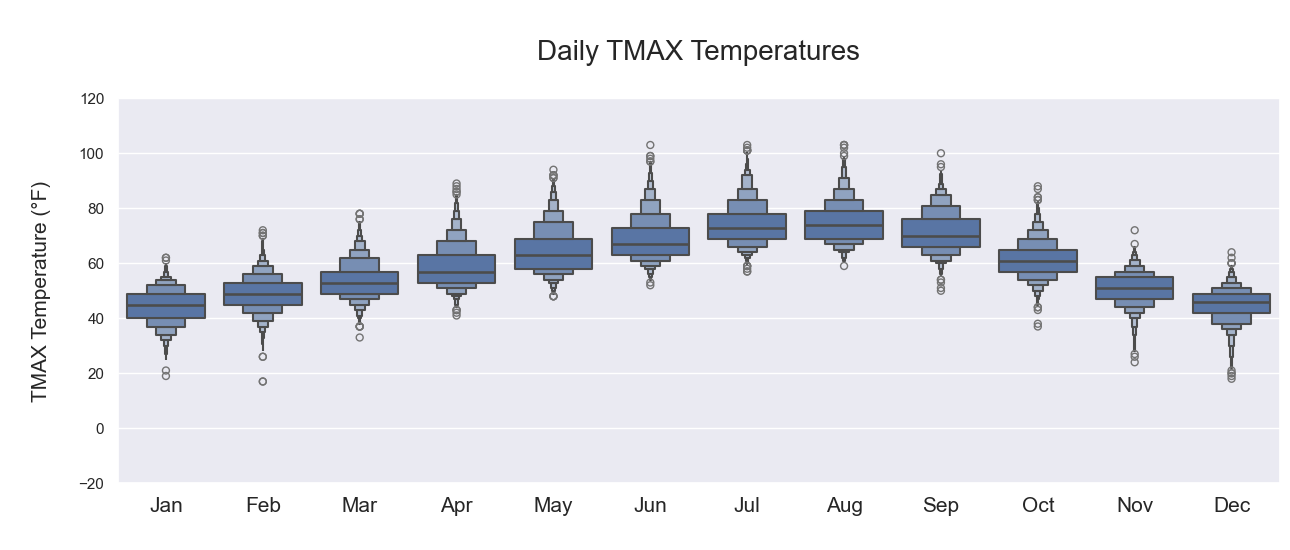

In [10]:
functions.plot_monthly_temp_plots(df1, metric='TMAX', ylim_low=-20, ylim_high=120)

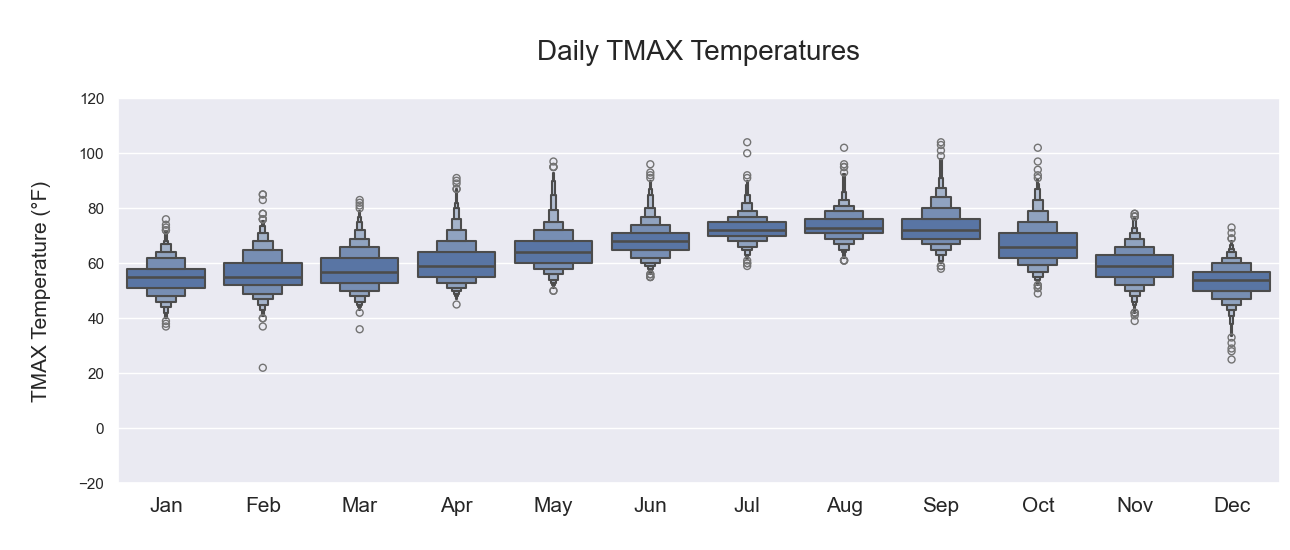

In [11]:
functions.plot_monthly_temp_plots(df2, metric='TMAX', ylim_low=-20, ylim_high=120)

## USDA Plant Hardiness Zones

A USDA hardiness zone is defined by the minimum annual temperature at a station, averaged over the last 30 years.  For example, by this metric:
* USDA Zone 8a falls within 10°F and 15°F
* USDA Zone 8b falls within 15°F and 20°F
* USDA Zone 9a falls within 20°F and 25°F


In [12]:
# Get Daily Minimum Temperature data
df = pd.read_csv('../data/temperature/temperature_97016.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df1 = df[df['STATION']=='USC00351643']

df2 = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
df2 = df2.assign(year = pd.to_datetime(df2['DATE']).dt.year)

df3 = pd.read_csv('../data/temperature/temperature_97218.csv')
df3 = df3.assign(year = pd.to_datetime(df3['DATE']).dt.year)

df4 = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
df4 = df4.assign(year = pd.to_datetime(df4['DATE']).dt.year)

# Verify that there is only one station per df
assert len(df1.STATION.unique()) == 1
assert len(df2.STATION.unique()) == 1
assert len(df3.STATION.unique()) == 1
assert len(df4.STATION.unique()) == 1

# Merge the stations into one df
df = pd.concat([df1, df2, df3, df4])
df

,STATION,NAME,DATE,TAVG,TMAX,TMIN,year
25291,USC00351643,"CLATSKANIE, OR US",1935-05-01,NaN,60.0,40.0,1935
25292,USC00351643,"CLATSKANIE, OR US",1935-05-02,NaN,67.0,36.0,1935
25293,USC00351643,"CLATSKANIE, OR US",1935-05-03,NaN,75.0,40.0,1935
25294,USC00351643,"CLATSKANIE, OR US",1935-05-04,NaN,74.0,41.0,1935
25295,USC00351643,"CLATSKANIE, OR US",1935-05-05,NaN,61.0,49.0,1935
...,...,...,...,...,...,...,...
31042,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-27,69.0,80.0,63.0,2024
31043,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-28,72.0,79.0,67.0,2024
31044,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-29,72.0,79.0,68.0,2024
31045,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",2024-12-30,70.0,77.0,66.0,2024


In [13]:
# Get weather station location data 
df_stations = pd.read_csv('../data/geo_data.csv')
# df_stations = df_stations[df_stations['STATION'].isin(list(set(df1['STATION'].unique()).union(df2['STATION'].unique())))]
df_stations = df_stations[df_stations['STATION'].isin(df['STATION'].unique())]

# Map the stations 
# US
map_plot = functions.map_stations(df_stations,
                       default_lat=40,
                       default_long=-95,
                       default_zoom=4,)

# # Oregon
# functions.map_stations(df_stations,
#                        default_lat=45.7,
#                        default_long=-122.7,
#                        default_zoom=9,)

# The latest vscode update breaks the ability to display folium maps (even when trust settings are set), need to save it
path_save = "/Users/alberta/Desktop/"
map_plot.save(path_save + "stations_map.html")
map_plot 

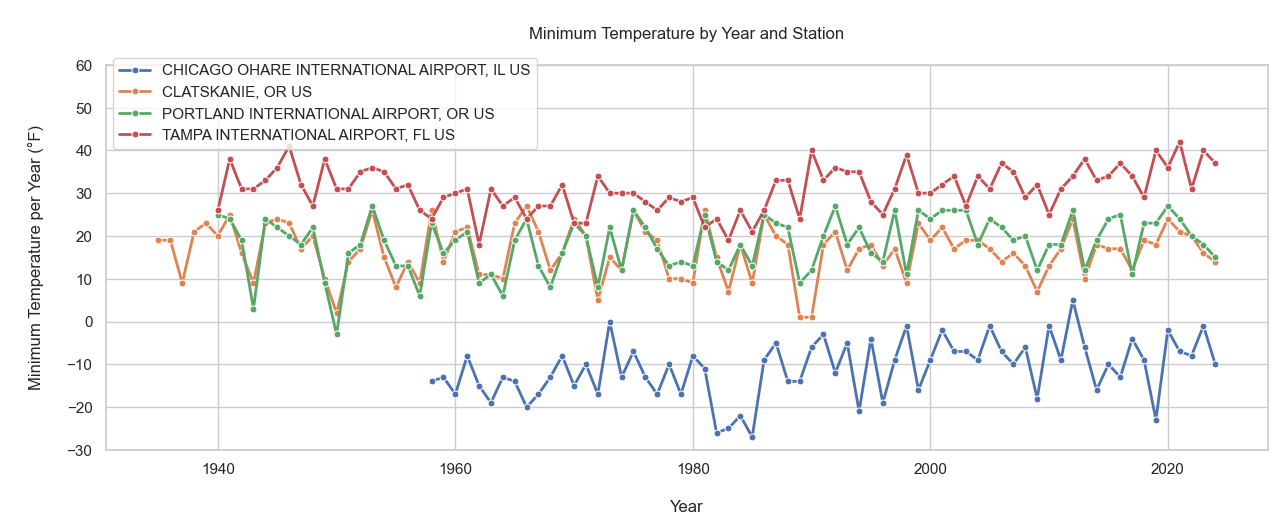

In [14]:
p_yearly_tmin, tmin = functions.tmin_annual_plot(df)

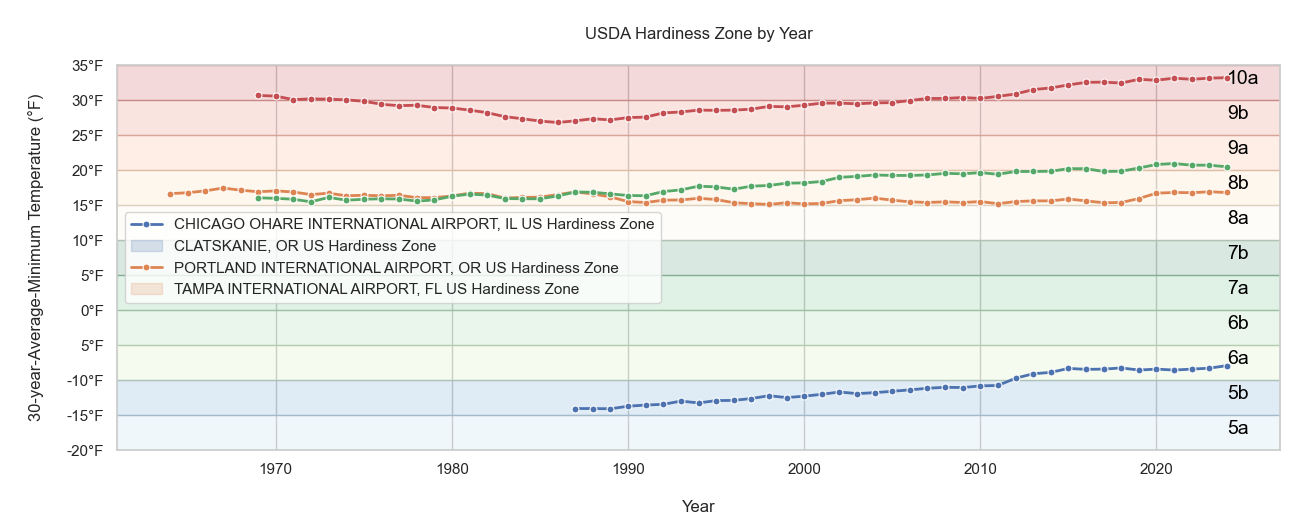

In [15]:
functions.usda_plant_hardiness_zone(tmin, legend_location='center left')

## The Ideal Temperature
### A TMAX comparison among locations in the US

In [16]:
# Get Daily Maximum Temperature data
df1 = pd.read_csv('../data/temperature/temperature_chicago_ord.csv')
df1 = df1.assign(year = pd.to_datetime(df1['DATE']).dt.year)
assert len(df1.STATION.unique()) == 1

df2 = pd.read_csv('../data/temperature/temperature_tampa_tpa.csv')
df2 = df2.assign(year = pd.to_datetime(df2['DATE']).dt.year)
assert len(df2.STATION.unique()) == 1

df3 = pd.read_csv('../data/temperature/temperature_97218.csv')
df3 = df3.assign(year = pd.to_datetime(df3['DATE']).dt.year)
assert len(df3.STATION.unique()) == 1

df4 = pd.read_csv('../data/temperature/temperature_97016.csv')
df4 = df4[df4['STATION']=='USC00351643']
df4 = df4.assign(year = pd.to_datetime(df4['DATE']).dt.year)
assert len(df4.STATION.unique()) == 1

df = pd.concat([df1, df2, df3, df4])[['DATE', 'year', 'NAME', 'TMAX']]
df = df[df['year']>2020]

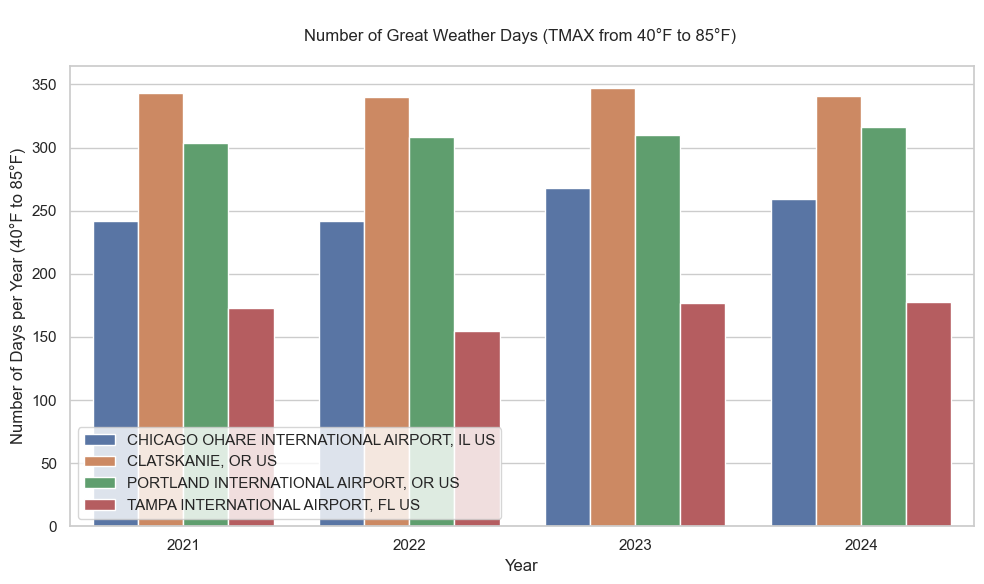

,ideal_days
NAME,
"CLATSKANIE, OR US",342.75
"PORTLAND INTERNATIONAL AIRPORT, OR US",309.50
"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",252.75
"TAMPA INTERNATIONAL AIRPORT, FL US",170.75


In [17]:
# okay_days
p, avg_days = functions.ideal_temp(df, 'TMAX', 40, 85)
avg_days

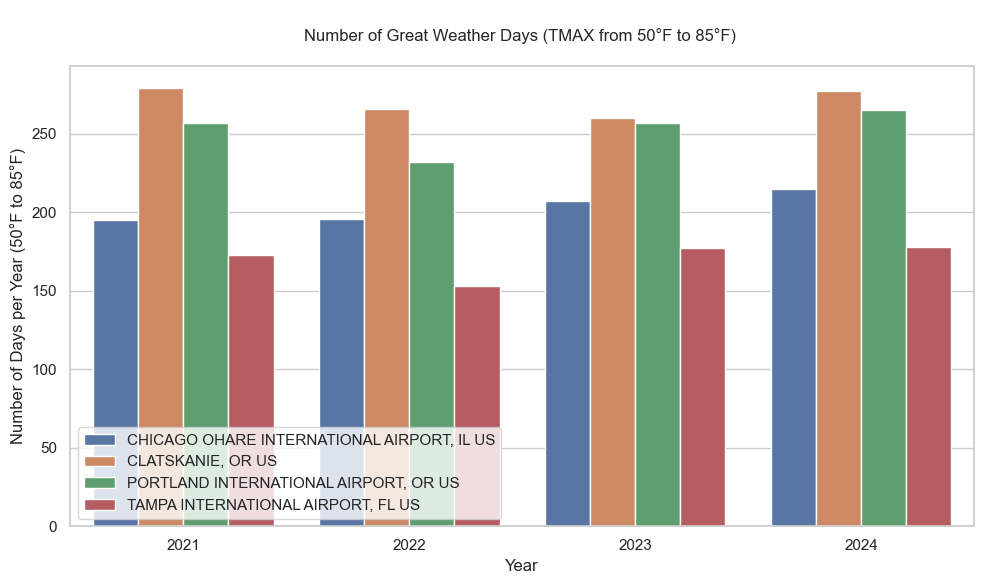

,ideal_days
NAME,
"CLATSKANIE, OR US",270.50
"PORTLAND INTERNATIONAL AIRPORT, OR US",252.75
"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",203.25
"TAMPA INTERNATIONAL AIRPORT, FL US",170.25


In [18]:
# fine_days
p, avg_days = functions.ideal_temp(df, 'TMAX', 50, 85)
avg_days

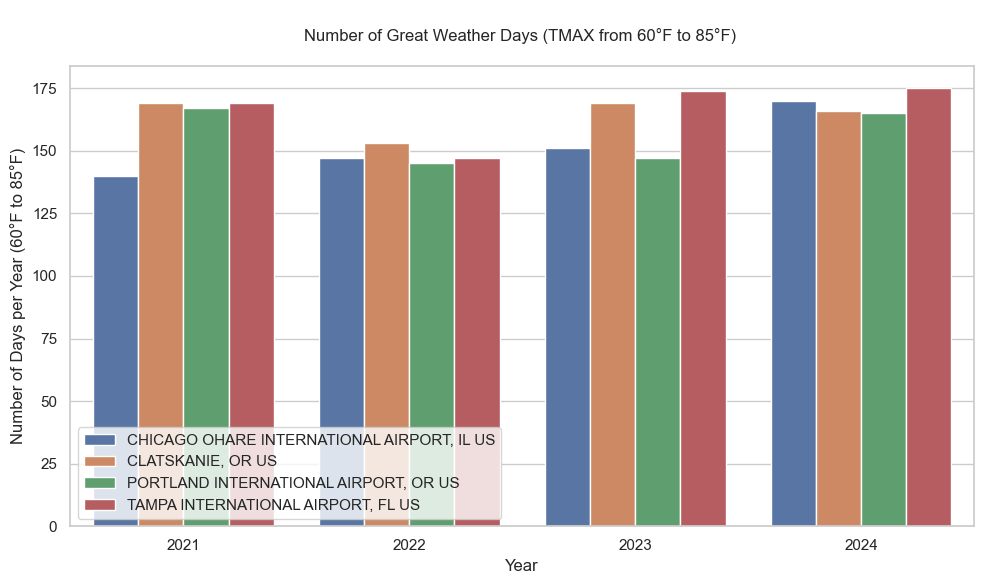

,ideal_days
NAME,
"TAMPA INTERNATIONAL AIRPORT, FL US",166.25
"CLATSKANIE, OR US",164.25
"PORTLAND INTERNATIONAL AIRPORT, OR US",156.00
"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",152.00


In [19]:
# great days
p, avg_days = functions.ideal_temp(df, 'TMAX', 60, 85)
avg_days

### A TMAX comparison among locations in Northwest Oregon

In [20]:
# Get Daily Maximum Temperature data
df3 = pd.read_csv('../data/temperature/temperature_97218.csv')
df3 = df3.assign(year = pd.to_datetime(df3['DATE']).dt.year)
assert len(df3.STATION.unique()) == 1

df4 = pd.read_csv('../data/temperature/temperature_97016.csv')
df4 = df4[df4['STATION']=='USC00351643']
df4 = df4.assign(year = pd.to_datetime(df4['DATE']).dt.year)
assert len(df4.STATION.unique()) == 1

df5 = pd.read_csv('../data/temperature/temperature_hillsboro.csv')
df5 = df5[df5['STATION'].isin(['USW00094261'])]
df5 = df5.assign(year = pd.to_datetime(df5['DATE']).dt.year)
assert len(df5.STATION.unique()) == 1

df6 = pd.read_csv('../data/temperature/temperature_finley_wildlife_refuge.csv')
df6 = df6.assign(year = pd.to_datetime(df6['DATE']).dt.year)
assert len(df6.STATION.unique()) == 1

df7 = pd.read_csv('../data/temperature/temperature_aberdeen.csv')
df7 = df7[df7['STATION'].isin(['USW00094225'])]
df7 = df7.assign(year = pd.to_datetime(df7['DATE']).dt.year)
assert len(df7.STATION.unique()) == 1

df8 = pd.read_csv('../data/temperature_coos_bay.csv')
df8 = df8[df8['STATION']=='USC00351836']
df8 = df8.assign(year = pd.to_datetime(df8['DATE']).dt.year)
assert len(df8.STATION.unique()) == 1

df = pd.concat([df3, df4, df5, df6, df7, df8])[['DATE', 'year', 'NAME', 'TMAX', 'TMIN']]
df = df[df['year']>2020]

In [21]:
# # Optional - verify that the TMAX is mostly not null
# df.groupby(['NAME', 'year']).count()

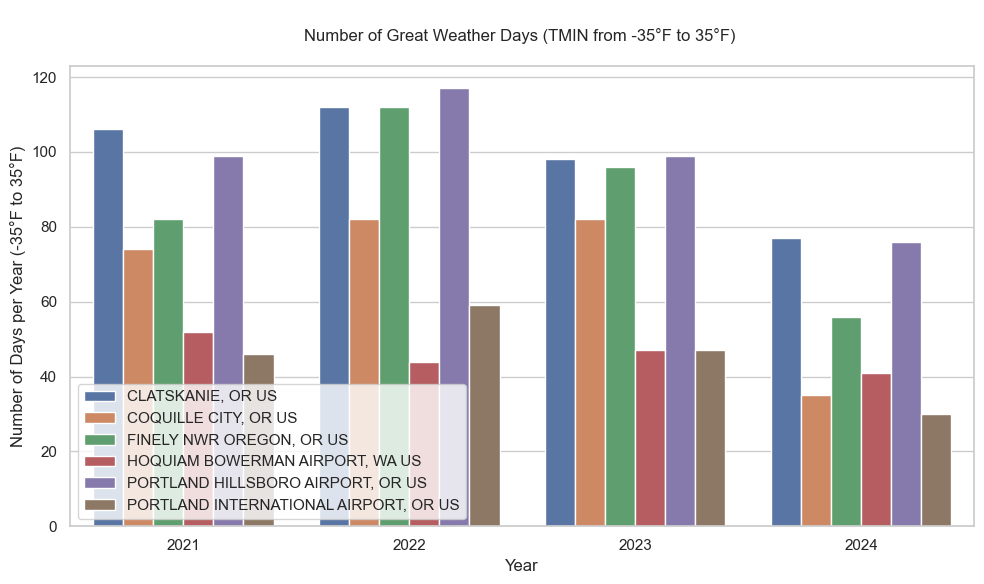

,ideal_days
NAME,
"CLATSKANIE, OR US",98.25
"PORTLAND HILLSBORO AIRPORT, OR US",97.75
"FINELY NWR OREGON, OR US",86.50
"COQUILLE CITY, OR US",68.25
"HOQUIAM BOWERMAN AIRPORT, WA US",46.00
"PORTLAND INTERNATIONAL AIRPORT, OR US",45.50


In [22]:
# freezing_days
p, freezing_days = functions.ideal_temp(df, 'TMIN', -35, 35)
freezing_days

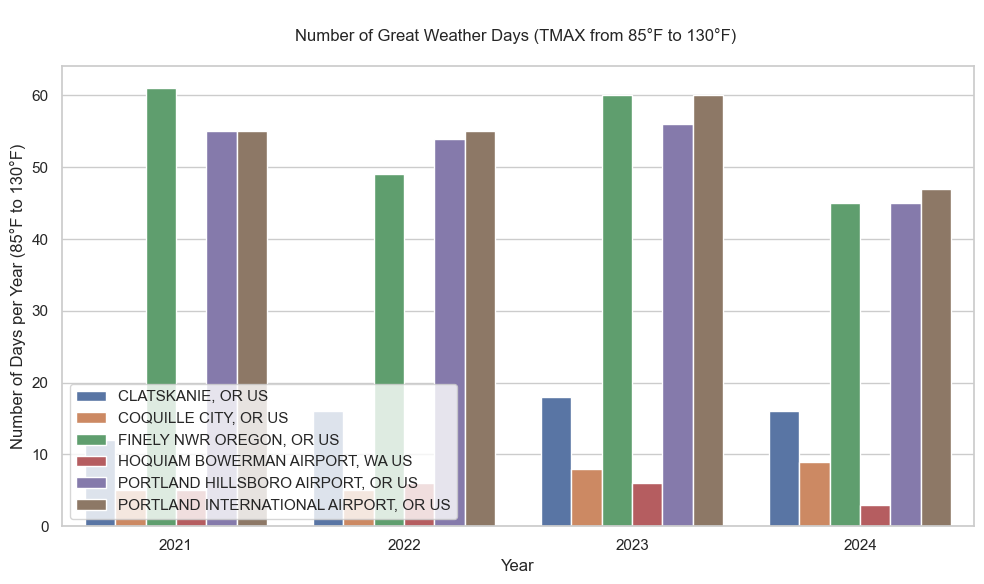

,ideal_days
NAME,
"PORTLAND INTERNATIONAL AIRPORT, OR US",54.25
"FINELY NWR OREGON, OR US",53.75
"PORTLAND HILLSBORO AIRPORT, OR US",52.50
"CLATSKANIE, OR US",15.50
"COQUILLE CITY, OR US",6.75
"HOQUIAM BOWERMAN AIRPORT, WA US",5.00


In [23]:
# hot_days
p, hot_days = functions.ideal_temp(df, 'TMAX', 85, 130)
hot_days

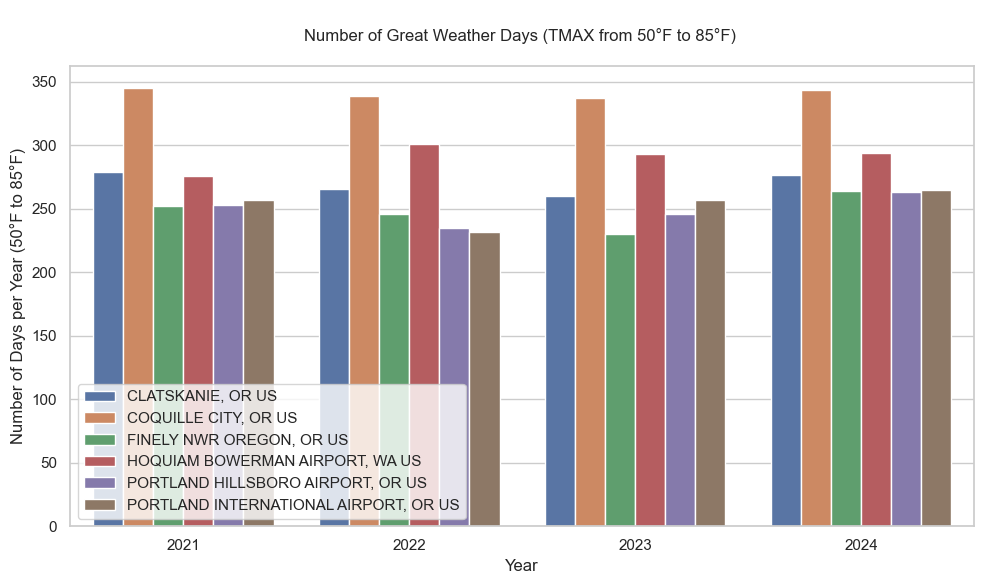

,ideal_days
NAME,
"COQUILLE CITY, OR US",341.25
"HOQUIAM BOWERMAN AIRPORT, WA US",291.00
"CLATSKANIE, OR US",270.50
"PORTLAND INTERNATIONAL AIRPORT, OR US",252.75
"PORTLAND HILLSBORO AIRPORT, OR US",249.25
"FINELY NWR OREGON, OR US",248.00


In [24]:
# fine_days
p, avg_fine_days = functions.ideal_temp(df, 'TMAX', 50, 85)
avg_fine_days

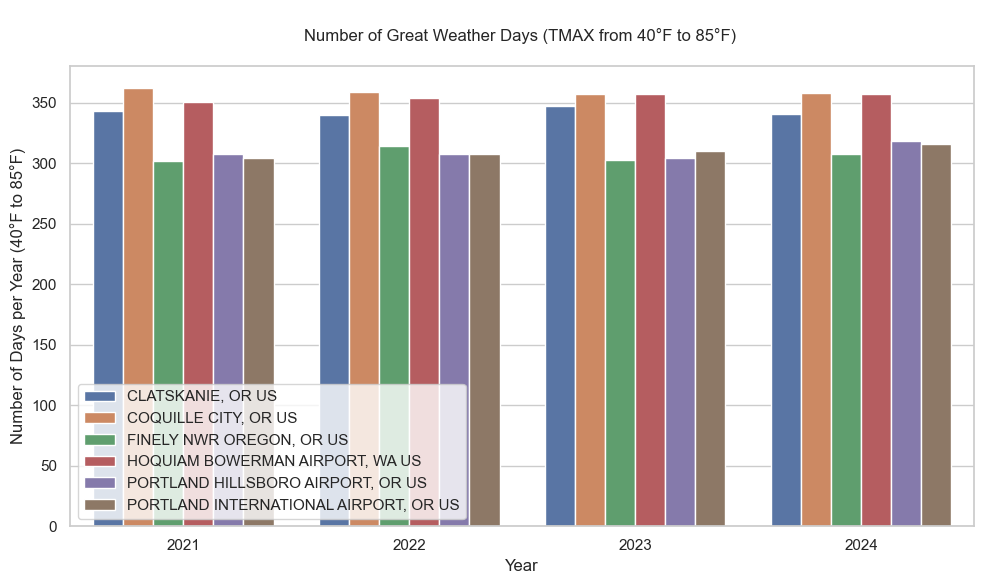

,ideal_days
NAME,
"COQUILLE CITY, OR US",359.00
"HOQUIAM BOWERMAN AIRPORT, WA US",354.75
"CLATSKANIE, OR US",342.75
"PORTLAND HILLSBORO AIRPORT, OR US",309.50
"PORTLAND INTERNATIONAL AIRPORT, OR US",309.50
"FINELY NWR OREGON, OR US",306.75


In [25]:
# okay_days
p, avg_okay_days = functions.ideal_temp(df, 'TMAX', 40, 85)
avg_okay_days

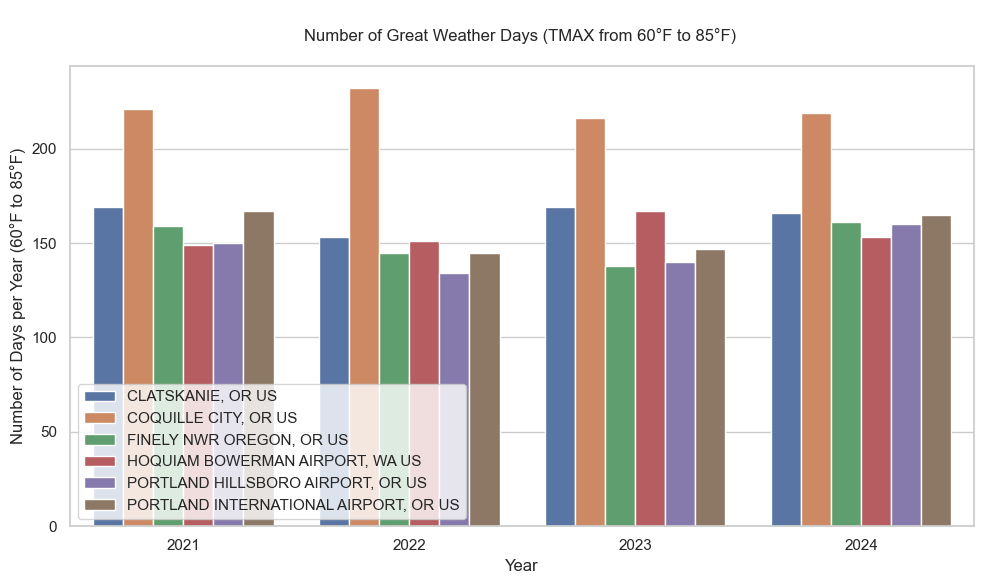

,ideal_days
NAME,
"COQUILLE CITY, OR US",222.00
"CLATSKANIE, OR US",164.25
"PORTLAND INTERNATIONAL AIRPORT, OR US",156.00
"HOQUIAM BOWERMAN AIRPORT, WA US",155.00
"FINELY NWR OREGON, OR US",150.75
"PORTLAND HILLSBORO AIRPORT, OR US",146.00


In [26]:
# fine_days
p, avg_great_days = functions.ideal_temp(df, 'TMAX', 60, 85)
avg_great_days

In [27]:
# Clatskanie example
# 340 is 9/10 okay days
print(342/365)
# 270 is 3/4 days fine days
print(270/365)
# 150 is 4/10 great days
print(156/365)

0.936986301369863
0.7397260273972602
0.4273972602739726
